<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Mathis Loevenich
* Date:   25.10.2022
* Matr. No.: 11157363 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web 
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
10. which statement can be made and which cannot? 
-----------------------------------------------------------------------------------

Name: Mathis Lövenich \
Matr. No.: 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, normal
import seaborn as sns
np.random.seed(1)

In [21]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))
    
    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    
    return anomalies

In [22]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
data = np.random.randn(50000)  * 20 + 20

In [23]:
anomalies = find_anomalies(data)

lower limit= -39.96482266
upper limit= 80.11636225


## Result
These anomalies are exceeding the lower and upper 3rd scatter range.
Thus, statistically spoken, they do belong to a population size of less than 0,3% of the entire data set! 
For sure, the above conclusion is true if and only if the data is normally distributed!


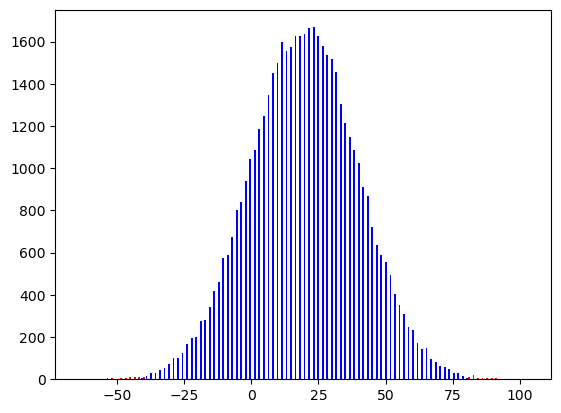

In [60]:
data_without_anomalies = [_ for _ in data if _ not in anomalies]
plt.hist([data_without_anomalies, anomalies], bins=100, color=["b", "r"])
plt.show()

In [73]:
def plot_hist_with_pdf(data, num_bins):
    mu = data.mean()
    sigma = data.std()
    
    fig, ax = plt.subplots()

    # the histogram of the data
    n, bins, patches = ax.hist(data, num_bins, density=True)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * ((bins - mu) / sigma)**2))
    
    ax.plot(bins, y, '--', c="r")
    plt.show()

In [119]:
def plot_with_anomalies(data, num_bins):
    anomalies = find_anomalies(data)
    data_without_anomalies = [_ for _ in data if _ not in anomalies]
    plt.hist([data_without_anomalies, anomalies], bins=num_bins, color=["b", "r"])
    plt.show()
    print("Anomaly-Percentage of data:", len(anomalies)/len(data))

### Human Heights and Weights

The following dataset can be found on: \
https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset?resource=download

It has collected weights and heights of 25.000 teenagers in the age of 18

In [94]:
heights_and_weights = (
    pd.read_csv("data/SOCR-HeightWeight.csv")
).rename(
    columns={
        'Height(Inches)': 'height', 
        'Weight(Pounds)': 'weight'
    }
)

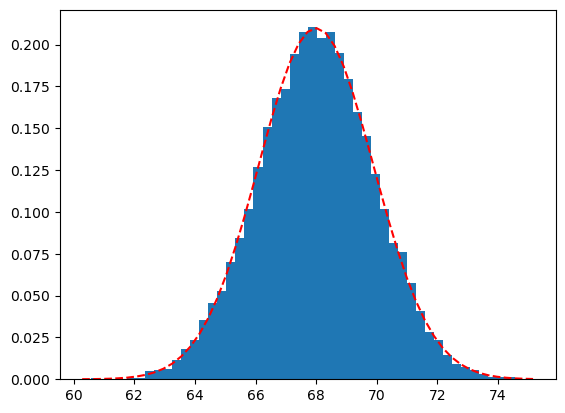

In [95]:
plot_hist_with_pdf(heights_and_weights["height"], 50)

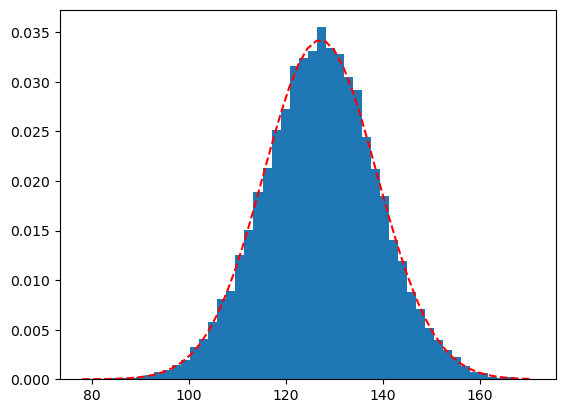

In [96]:
plot_hist_with_pdf(heights_and_weights["weight"], 50)

Both are normally distributed as we see that the Probability Density Function can alsmost perfectly describe the data.

In [131]:
penguins = sns.load_dataset("penguins")

### Penguin flipper length

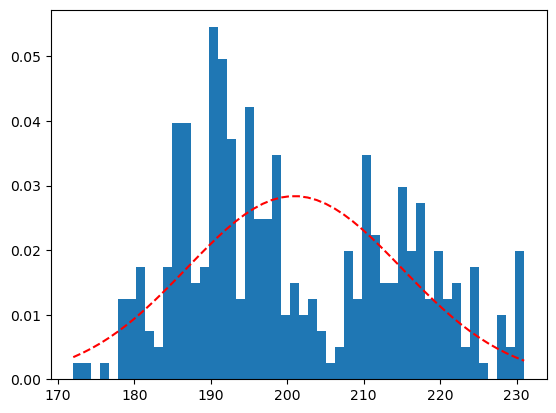

In [110]:
plot_hist_with_pdf(penguins["flipper_length_mm"], 50)

This data is clearly not normally distributed as we have a two peaks and a bottom in between. The probability density function for this data is hardly incorrect for values in between 200 - 210 and does not reflect the reality of this data.

This is for obvious reasons. The data consists of flipper length for three different species which have different natural body statures.

lower limit= 62.28819139
upper limit= 73.69803581


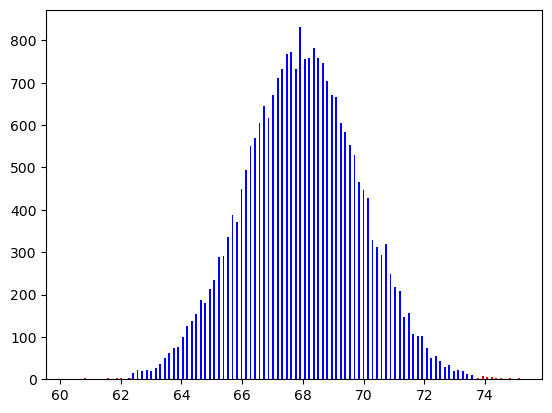

Anomaly-Percentage of data: 0.00204


In [120]:
plot_with_anomalies(heights_and_weights["height"],100)

lower limit= 92.09742813
upper limit= 162.06141419


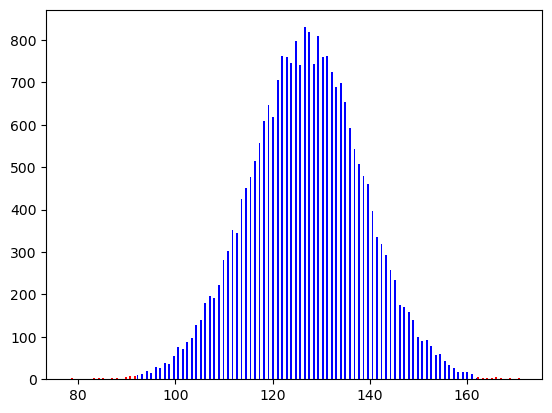

Anomaly-Percentage of data: 0.00276


In [121]:
plot_with_anomalies(heights_and_weights["weight"],100)

lower limit= 158.79178297
upper limit= 243.03862638


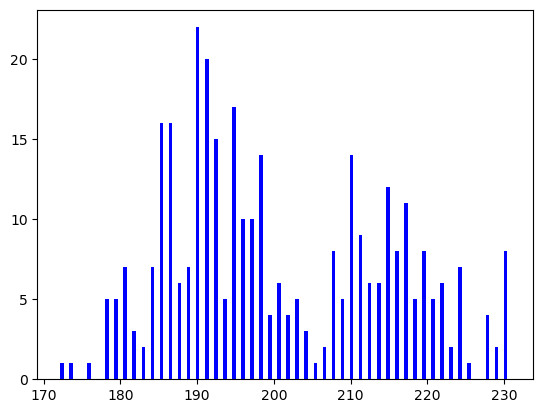

Anomaly-Percentage of data: 0.0


In [122]:
plot_with_anomalies(penguins["flipper_length_mm"], 50)

As we see here, no anomlies can be detected this way. This is because we have no normal distribution and therefore the variance is much higher.

As we can observe above the 0.3 % rule holds for the normal distributed data

The outlier detection for normal distributed data should always work, 
if the number of observations is high enough that we can assume that a normal distribution is given. However for the non-normal distributed dataset we would need a different approach, for e.g. clustering to find anomlies as we have a different kind of distribution.

It can be said, that for the normal distributed datasets it's a good measure to find anomalies that way, as 99.7 % of the data is bounded by the interval [mu-3*simga, mu+3*sigma] by the sigma rule, given that sigma > 3 as a strong indicator for that rule.

This is a mathematical known fact and therefore very useful here.

For the non-normal distributed data it would make sense to use clustering or to split the data in half somewhere in between 200-210 and to describe the splits with the probabily density function again. Then you would need to intersect the results and to make meaning of it. 

Lets assume we can do so, I will set a treshold, just by intuition to see what we might get

lower limit= 171.87699927
upper limit= 210.07515384


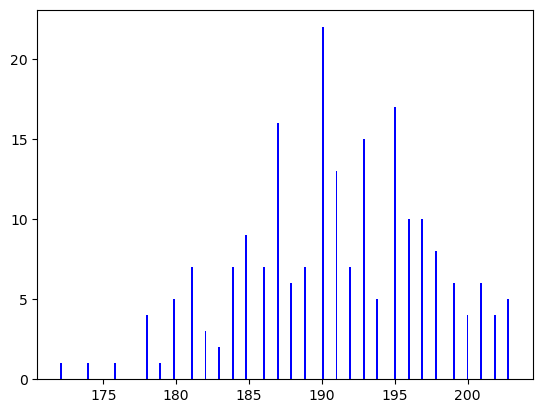

Anomaly-Percentage of data: 0.0
lower limit= 196.61182883
upper limit= 236.45584035


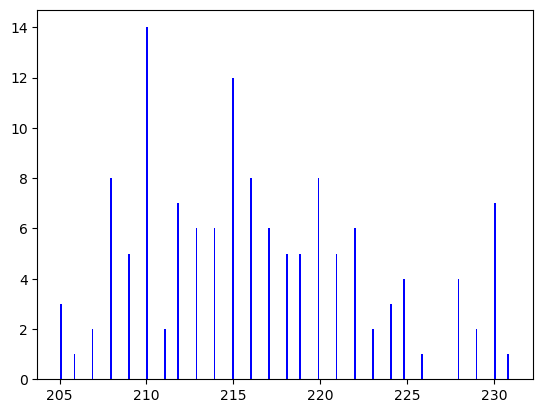

Anomaly-Percentage of data: 0.0


In [130]:
threshold_x = 205 # Threshold to separate values

x = penguins["flipper_length_mm"]

x_lower, x_upper = (
    [_ for _ in x if _ < threshold_x], 
    [_ for _ in x if _ >= threshold_x]
)

plot_with_anomalies(x_lower, 100)
plot_with_anomalies(x_upper, 100)

In this particular example we yield no different result as above but it was worth a shot.

This means it's likely also for other non-normal distributed datasets that we will need different approaches,
when we want to find anomalies